# Сессия 1

### 1.1 Парсинг данных

Описание библиотек:

1) pandas для работы с данными;

2) matplotlib, seaborn, plotly  для работы с графиками;

3) datetime для даты и времени;

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings(action="ignore")

Находим репозиторий с нужным csv файлом и считываем его в dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
print(df.shape)
df.head(10)

(376797, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Итого мы имеем структуру данных о заражённых в разных странах и городах. В таблице имеется 373437 строк данных и 67 признаков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376797 entries, 0 to 376796
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    376797 non-null  object 
 1   continent                                   358802 non-null  object 
 2   location                                    376797 non-null  object 
 3   date                                        376797 non-null  object 
 4   total_cases                                 338085 non-null  float64
 5   new_cases                                   366116 non-null  float64
 6   new_cases_smoothed                          364886 non-null  float64
 7   total_deaths                                316113 non-null  float64
 8   new_deaths                                  366124 non-null  float64
 9   new_deaths_smoothed                         364894 non-null  float64
 

Просмотрев информацию о dataframe, можно увидеть, что в некоторых столбцах пропущенно множество значений, далее просмотрим каких значений сличком мало и будем либо заполнять пропущеные значения, либо исключать признаки из выборки. Имеется 5 признака типа object, остальные 62 признака имееют тип float64, что упростит работу с данными, так как не нужно преобразовывать типы.

Загрузить данные с ресурсов. Необходимо оставить __не менее 40%__ от исходного количества записей. В наборах данных для последующего обучения должны быть включены записи по каждому месяцу, присутствующему в исходных наборах, в пропорциональном количестве.

Для начала преобразуем тип данных, для "изъятья" данных по месяцам.

In [5]:
# Преобразовываем столбец даты из строки в тип datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

Теперь просмотрим соотношение, что бы проверить правильно ли мы проделали работу с выборкой.

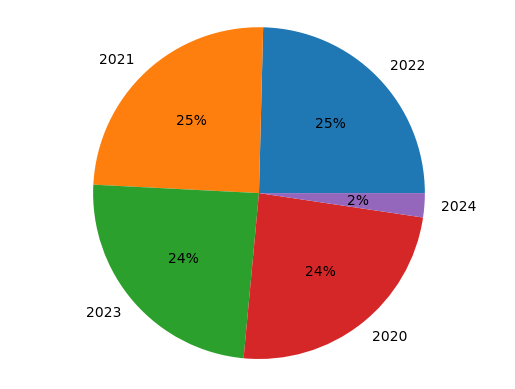

In [7]:
# Пирог соотношения данных
plt.pie(df['year'].value_counts(), labels= df['year'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

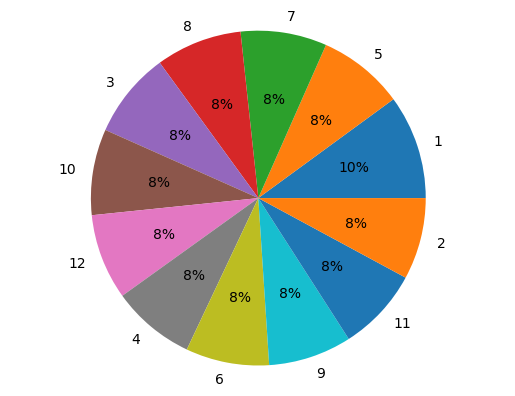

In [8]:
plt.pie(df['month'].value_counts(), labels= df['month'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

По графикам можно увидеть соотношение по годам:

    2020, 2023 - 24%
    2021, 2022 - 25%
    2024 - 2%
    
Соотношение по месяцам:

    январь - 10%
    остальные месяца по 8%

Проверим даннные по колчеству значений.

In [9]:
df['month'].value_counts()

1     37872
5     31372
7     31353
8     31341
3     31338
10    31281
12    31210
4     30374
6     30360
9     30324
11    30270
2     29702
Name: month, dtype: int64

По колчеству данных, можем увидеть, что в январе явно больше данных 37к, в других месяцах от 29к до 31к.

Теперь сделаем выборку 40% по месяцам.

In [10]:
result = pd.DataFrame()
df_gr = df.groupby(['month'])

# Перебираем месяцы, делаем выборку в 40 процентов и записываем в фреим
for i in range(1, 13):
    df_i = df_gr.get_group(i).sample(frac=0.41, replace=False)
    result = result.append(df_i, ignore_index = True)

print(result.shape)
result.head()

(154489, 70)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day,month,year
0,VUT,Oceania,Vanuatu,2022-01-18,7.0,0.0,0.000,NaN,0.0,0.0,...,70.47,0.609,326744.0,NaN,NaN,NaN,NaN,18,1,2022
1,ECU,South America,Ecuador,2020-01-12,NaN,0.0,0.000,NaN,0.0,0.0,...,77.01,0.759,18001002.0,-73.4,-2.44,4.04,-4.173159,12,1,2020
2,LKA,Asia,Sri Lanka,2020-01-21,NaN,0.0,0.000,NaN,0.0,0.0,...,76.98,0.782,21832150.0,NaN,NaN,NaN,NaN,21,1,2020
3,GNB,Africa,Guinea-Bissau,2020-01-15,NaN,0.0,0.000,NaN,0.0,0.0,...,58.32,0.480,2105580.0,NaN,NaN,NaN,NaN,15,1,2020
4,COK,Oceania,Cook Islands,2023-01-25,6988.0,0.0,5.143,1.0,0.0,0.0,...,76.25,NaN,17032.0,NaN,NaN,NaN,NaN,25,1,2023


Для проверки проделанной рабоны, проверим пропорциональность данных.

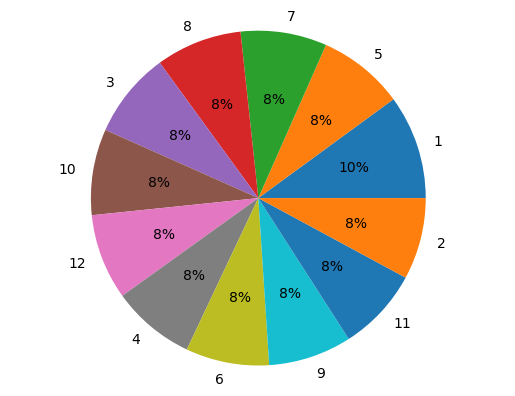

In [11]:
plt.pie(result['month'].value_counts(), labels= result['month'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

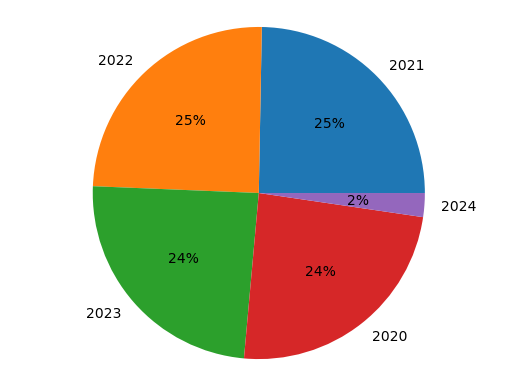

In [12]:
plt.pie(result['year'].value_counts(), labels= result['year'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

In [13]:
print(f'Процент от выборки составил: {round(result.shape[0]/df.shape[0], 3)}%')

Процент от выборки составил: 0.41%


Пропорций по месяцам сохранились, процент от выборки составил не менее 40%, можем продолжать работу с данным фреимом.

In [14]:
# Удаляем не нужные столбцы
result = result.drop(['year', 'month', 'day'], axis=1)
df = result

In [15]:
print(df.shape)
df.head()

(154489, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,VUT,Oceania,Vanuatu,2022-01-18,7.0,0.0,0.000,NaN,0.0,0.0,...,34.5,25.209,NaN,70.47,0.609,326744.0,NaN,NaN,NaN,NaN
1,ECU,South America,Ecuador,2020-01-12,NaN,0.0,0.000,NaN,0.0,0.0,...,12.3,80.635,1.5,77.01,0.759,18001002.0,-73.4,-2.44,4.04,-4.173159
2,LKA,Asia,Sri Lanka,2020-01-21,NaN,0.0,0.000,NaN,0.0,0.0,...,27.0,NaN,3.6,76.98,0.782,21832150.0,NaN,NaN,NaN,NaN
3,GNB,Africa,Guinea-Bissau,2020-01-15,NaN,0.0,0.000,NaN,0.0,0.0,...,NaN,6.403,NaN,58.32,0.480,2105580.0,NaN,NaN,NaN,NaN
4,COK,Oceania,Cook Islands,2023-01-25,6988.0,0.0,5.143,1.0,0.0,0.0,...,NaN,NaN,NaN,76.25,NaN,17032.0,NaN,NaN,NaN,NaN


В итоге получилась выборка с 150650 значениями. Так же не присутвуют повторяющиеся значения.

### 1.3 Описание структуры набора данных

Для каждого атрибута подготовьте описание, содержащее текстовое представление (расшифровка, перевод, назначение). Выполнить проверку нормальности распределения значений в атрибутах. Для определения отклонений от нормы провести графическую и статистические оценки. Обосновать выбор методов оценки. На основе полученных результатов сделать вывод о типе распределения и мере скошенности.


#### Описание атрибутов

типо описание

#### Нормальность распределения

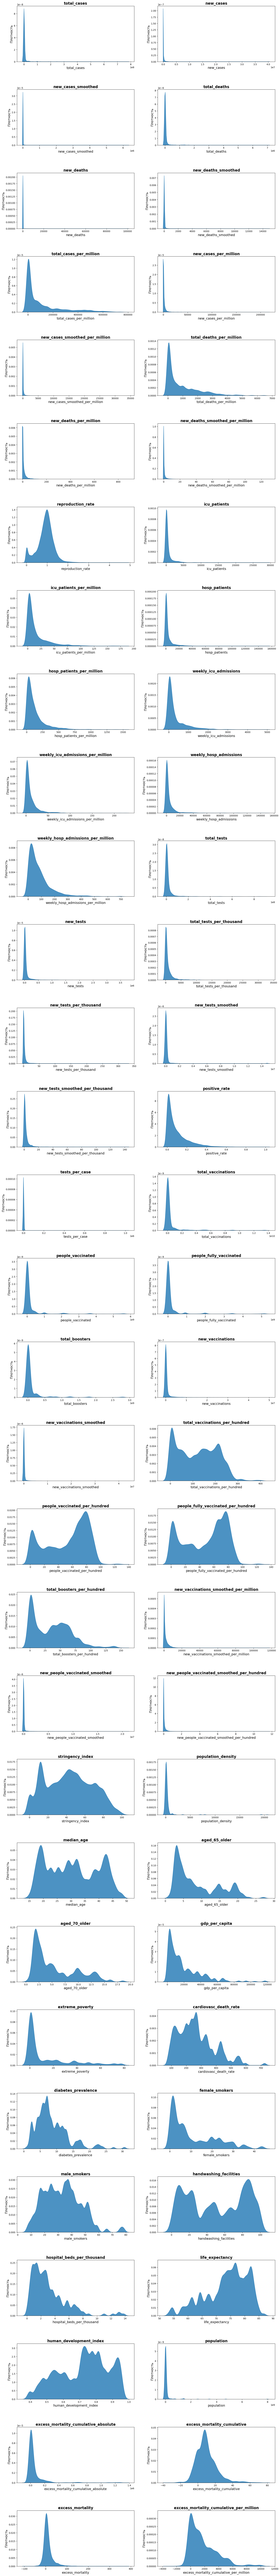

In [17]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(31,2, figsize = (20,200))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns
# Отбираем столбы с типом floate
columns = list(columns[4:])
columns.remove(columns[29])

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    
plt.show()